In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

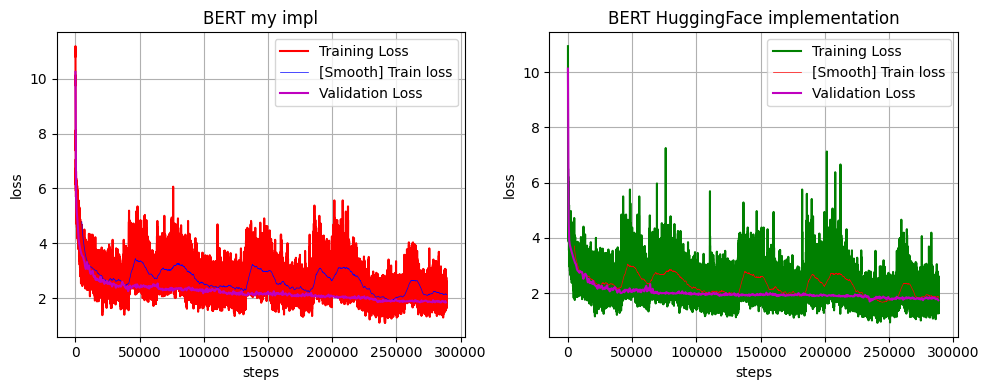

In [20]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4)) # Adjust figsize as needed

# train_log1 = pd.read_csv('./output_history/bert_train_log_10072025.csv')
train_log1 = pd.read_csv('./output_history/bert_train_log_14072025.csv')
train_log2 = pd.read_csv('./output_history/bert_hf_train_log_13072025.csv')
train_log1=train_log1[:-46] #to align with logs from train_log2

# val_log1 = pd.read_csv('./output_history/bert_val_log_10072025.csv')
val_log1 = pd.read_csv('./output_history/bert_val_log_14072025.csv')
val_log2 = pd.read_csv('./output_history/bert_hf_val_log_13072025.csv')
show_val_loss = True

# Apply a moving average
window_size = 5000
smoothed_loss = np.convolve(train_log1['loss'], np.ones(window_size)/window_size, mode='valid')
# print(len(smoothed_loss))
# print(len(train_log1['loss'])) #step,accuracy,loss,lr

ax1.plot(train_log1['step'], train_log1['loss'], 'r', label='Training Loss')
ax1.plot(train_log1['step'][window_size-1:], smoothed_loss, 'b', label='[Smooth] Train loss', linewidth=0.5)
if show_val_loss:
    # ax1.plot(val_log1['step'], val_log1[' val_loss'], 'm', label='Validation Loss')
    ax1.plot(val_log1['step'], val_log1['val_loss'], 'm', label='Validation Loss')

ax1.set_xlabel('steps')
ax1.set_ylabel('loss')
ax1.set_title('BERT my impl')
ax1.grid(True)
ax1.legend()

#plt 2
smoothed_loss2 = np.convolve(train_log2['loss'], np.ones(window_size)/window_size, mode='valid')
ax2.plot(train_log2['step'], train_log2['loss'], 'g', label='Training Loss')
ax2.plot(train_log2['step'][window_size-1:], smoothed_loss2, 'r', label='[Smooth] Train loss', linewidth=0.5)
if show_val_loss:
    ax2.plot(val_log2['step'], val_log2[' val_loss'], 'm', label='Validation Loss')
ax2.set_xlabel('steps')
ax2.set_ylabel('loss')
ax2.set_title('BERT HuggingFace implementation')
ax2.grid(True)
ax2.legend()


# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Display the plots
plt.show()

# moviing avg for plot2
#plt.plot(train_log2['step'], train_log1['loss'], 'g', label='Training Loss')
# 
#plt.plot(train_log2['step'][window_size-1:], smoothed_loss2, 'g', label='[Smooth] Train loss', linewidth=0.5)

#test val loss
fig.savefig('sample_plot.png', dpi=300, bbox_inches='tight')

578
Index(['step', ' val_loss', ' val_acc'], dtype='object')


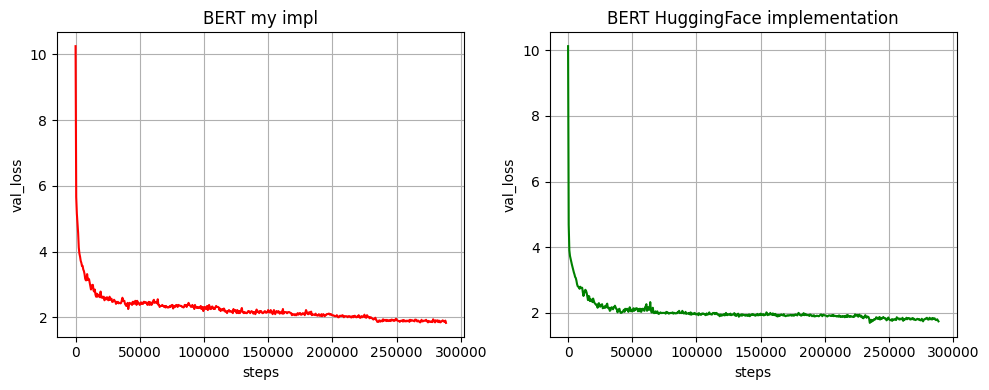

In [36]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4)) # Adjust figsize as needed

val_log1 = pd.read_csv('./output_history/bert_val_log_10072025.csv')
val_log2 = pd.read_csv('./output_history/bert_hf_val_log_13072025.csv')
#train_log1=train_log1[:-46] #to align with logs from train_log2
print(len(val_log1))
print(val_log2.columns)
# print(len(val_log2))

# Apply a moving average
window_size = 5
smoothed_loss = np.convolve(val_log1[' val_loss'], np.ones(window_size)/window_size, mode='valid')
# print(len(smoothed_loss))
# print(len(train_log1['loss'])) #step,accuracy,loss,lr

ax1.plot(val_log1['step'], val_log1[' val_loss'], 'r', label='Training Loss')
# print(len(val_log1['step'][window_size-1:]))
# print(len(smoothed_loss))
# ax1.plot(val_log1['step'][window_size-1:], smoothed_loss, 'b', label='[Smooth] Train loss', linewidth=0.5)
ax1.set_xlabel('steps')
ax1.set_ylabel('val_loss')
ax1.set_title('BERT my impl')
ax1.grid(True)

#plt 2
smoothed_loss2 = np.convolve(val_log2[' val_loss'], np.ones(window_size)/window_size, mode='valid')
ax2.plot(val_log2['step'], val_log2[' val_loss'], 'g', label='Training Loss')
# ax2.plot(val_log2['step'][window_size-1:], smoothed_loss2, 'r', label='[Smooth] Train loss', linewidth=0.5)
ax2.set_xlabel('steps')
ax2.set_ylabel('val_loss')
ax2.set_title('BERT HuggingFace implementation')
ax2.grid(True)


# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Display the plots
plt.show()

fig.savefig('sample_val_plot.png', dpi=300, bbox_inches='tight')

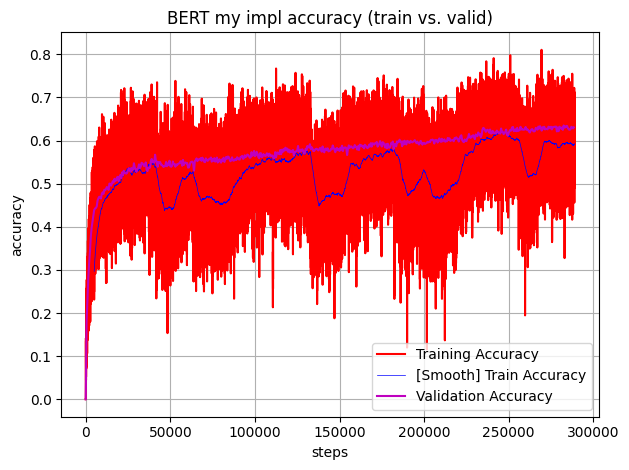

In [26]:
# =========== ACCURACY


train_log1 = pd.read_csv('./output_history/bert_train_log_14072025.csv')
val_log1 = pd.read_csv('./output_history/bert_val_log_14072025.csv')

show_val_loss = True

# Apply a moving average
window_size = 5000
smoothed_loss = np.convolve(train_log1['accuracy'], np.ones(window_size)/window_size, mode='valid')
# print(len(smoothed_loss))
# print(len(train_log1['loss'])) #step,accuracy,loss,lr

plt.plot(train_log1['step'], train_log1['accuracy'], 'r', label='Training Accuracy')
plt.plot(train_log1['step'][window_size-1:], smoothed_loss, 'b', label='[Smooth] Train Accuracy', linewidth=0.5)

plt.plot(val_log1['step'], val_log1['val_acc'], 'm', label='Validation Accuracy')

plt.xlabel('steps')
plt.ylabel('accuracy')
plt.title('BERT my impl accuracy (train vs. valid)')
plt.grid(True)
plt.legend()

plt.savefig('sample_plot_acc.png', dpi=300, bbox_inches='tight')

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Display the plots
plt.show()